In [1]:
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import numpy as np
import uproot
import os
import glob
import awkward as ak
from scipy.stats import norm
plt.rcParams["xtick.top"] = True    # enable top x-ticks
plt.rcParams["ytick.right"] = True  # enable right y-ticks
plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"

In [2]:
data_path = "/home/haue/repositories/Masters/data/alphas/Al/"
bgpath =  "/home/haue/repositories/Masters/data/sorted/background"

Al_files = glob.glob(os.path.join(data_path, "*mlio.root"))
bgfiles = glob.glob(os.path.join(bgpath, "*.root"))

In [3]:

Eb = np.array([])
for batch in uproot.iterate(bgfiles, expressions=["E"],
                            cut="(id==1) | (id==2)"):
    Eb = np.append(Eb, ak.flatten(batch.E))

Eb1 = np.array([])
for batch in uproot.iterate(bgfiles, expressions=["E"],
                            cut="(id==1)"):
    Eb1 = np.append(Eb1, ak.flatten(batch.E))

Eb2 = np.array([])
for batch in uproot.iterate(bgfiles, expressions=["E"],
                            cut="(id==2)"):
    Eb2 = np.append(Eb2, ak.flatten(batch.E))
    
    
    
E = np.array([])
for batch in uproot.iterate(Al_files, expressions=["Ea"],
                            cut="(id==1) | (id==2)"):
    E = np.append(E, ak.flatten(batch.Ea))
    
E1 = np.array([])
for batch in uproot.iterate(Al_files, expressions=["Ea"],
                            cut="(id==1)"):
    E1 = np.append(E1, ak.flatten(batch.Ea))
E2 = np.array([])
for batch in uproot.iterate(Al_files, expressions=["Ea"],
                            cut="(id==2)"):
    E2 = np.append(E2, ak.flatten(batch.Ea))

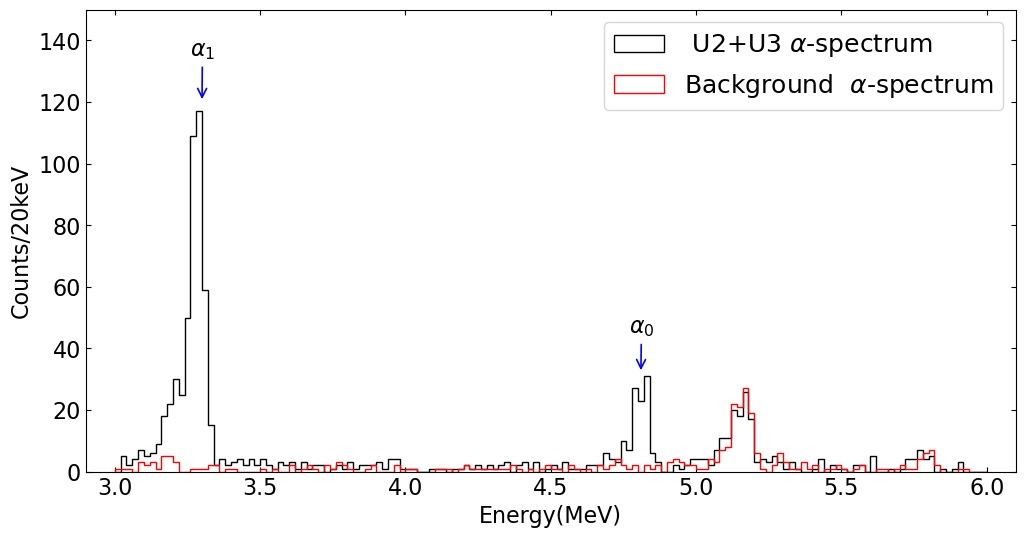

In [49]:
plt.rcParams.update({'font.size': 16})
plt.figure(figsize=(12,6))
plt.hist(E/1e3, bins=np.arange(3,6+0.02,0.02), histtype='step', color='k', label=r" U2+U3 $\alpha$-spectrum")
plt.hist(Eb/1.004/1e3, bins=np.arange(3,6+0.02,0.02), histtype='step', color='r', label=r"Background  $\alpha$-spectrum")
plt.yscale('linear')
plt.xlabel("Energy(MeV)")
plt.ylabel("Counts/20keV")
plt.xticks(np.arange(2,7,0.5))
plt.xlim(2.9,6.1)
plt.ylim(0,150)
plt.legend(fontsize=18)
plt.annotate(r"$\alpha_1$", (3.3,120), (3.258,135), arrowprops=dict(arrowstyle="->", lw=1.2, color="blue"), fontsize=16)
plt.annotate(r"$\alpha_0$", (4.81,32), (4.768,45), arrowprops=dict(arrowstyle="->", lw=1.2, color="blue"), fontsize=16)

plt.show()
